## EST - Project

In [64]:
# Import libraries
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm

import geopandas as gpd
from shapely.geometry import Point
import folium

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# You can ignore the Shapely GEOS warning :-)

In [4]:
train_df=pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data = pd.read_csv('train.csv').drop('ID_LAT_LON_YEAR_WEEK', axis =1)

In [5]:
print(len(train_df.columns))

76


In [6]:
# print test columns
print(len(test_df.columns))

75


In [7]:
train_df =train_df[['latitude', 'longitude', 'year','week_no','SulphurDioxide_SO2_column_number_density','SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density','NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_NO2_slant_column_number_density','NitrogenDioxide_tropopause_pressure','NitrogenDioxide_absorbing_aerosol_index','NitrogenDioxide_cloud_fraction','NitrogenDioxide_sensor_altitude','NitrogenDioxide_sensor_azimuth_angle','NitrogenDioxide_sensor_zenith_angle','NitrogenDioxide_solar_azimuth_angle','NitrogenDioxide_solar_zenith_angle','emission']]
test_df = test_df[['latitude', 'longitude', 'year','week_no','SulphurDioxide_SO2_column_number_density','SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density','NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_NO2_slant_column_number_density','NitrogenDioxide_tropopause_pressure','NitrogenDioxide_absorbing_aerosol_index','NitrogenDioxide_cloud_fraction','NitrogenDioxide_sensor_altitude','NitrogenDioxide_sensor_azimuth_angle','NitrogenDioxide_sensor_zenith_angle','NitrogenDioxide_solar_azimuth_angle','NitrogenDioxide_solar_zenith_angle']]

In [8]:
train_df.describe(include = 'all')

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,emission
count,79023.00000,79023.00000,79023.00000,79023.00000,64414.00000,64414.00000,64414.00000,64414.00000,64414.00000,64414.00000,...,60703.00000,60703.00000,60703.00000,60703.00000,60703.00000,60703.00000,60703.00000,60703.00000,60703.00000,79023.00000
mean,-1.89107,29.88015,2020.00000,26.00000,0.00005,0.83485,0.00004,0.15842,-7.92587,37.43619,...,0.00010,8922.56899,-1.81216,0.09701,829994.22447,-15.93770,36.85264,-84.26008,28.31639,81.94055
std,0.69452,0.81038,0.81650,15.29716,0.00027,0.18538,0.00021,0.07136,64.26337,14.14995,...,0.00002,892.45711,0.68733,0.05760,220.14697,68.01701,15.11766,37.30520,5.60212,144.29965
min,-3.29900,28.22800,2019.00000,0.00000,-0.00100,0.24182,-0.00089,0.00000,-179.53706,0.09924,...,0.00003,7311.86845,-4.60367,0.00000,829248.03783,-179.53706,0.09924,-158.88332,8.22752,0.00000
25%,-2.45100,29.26200,2019.00000,13.00000,-0.00010,0.70582,-0.00008,0.11053,-56.78238,28.84452,...,0.00008,8613.27580,-2.26032,0.05992,829847.87500,-98.25137,26.65263,-121.59779,24.54708,9.79800
50%,-1.88200,29.88300,2020.00000,26.00000,0.00002,0.80912,0.00002,0.16185,-12.44173,37.78430,...,0.00010,8613.72066,-1.86865,0.09098,830007.83333,-13.02129,36.95229,-81.62803,28.79709,45.59345
75%,-1.30300,30.47100,2021.00000,39.00000,0.00015,0.94279,0.00012,0.21182,72.05999,47.63488,...,0.00011,9579.04667,-1.42101,0.12454,830150.11875,71.81261,48.01752,-48.27534,32.28696,109.54959
max,-0.51000,31.53200,2021.00000,52.00000,0.00419,1.88524,0.00424,0.30000,122.09520,66.24201,...,0.00023,13031.05476,1.37217,0.76575,830581.56250,122.09520,66.24187,-19.86392,42.98186,3167.76800


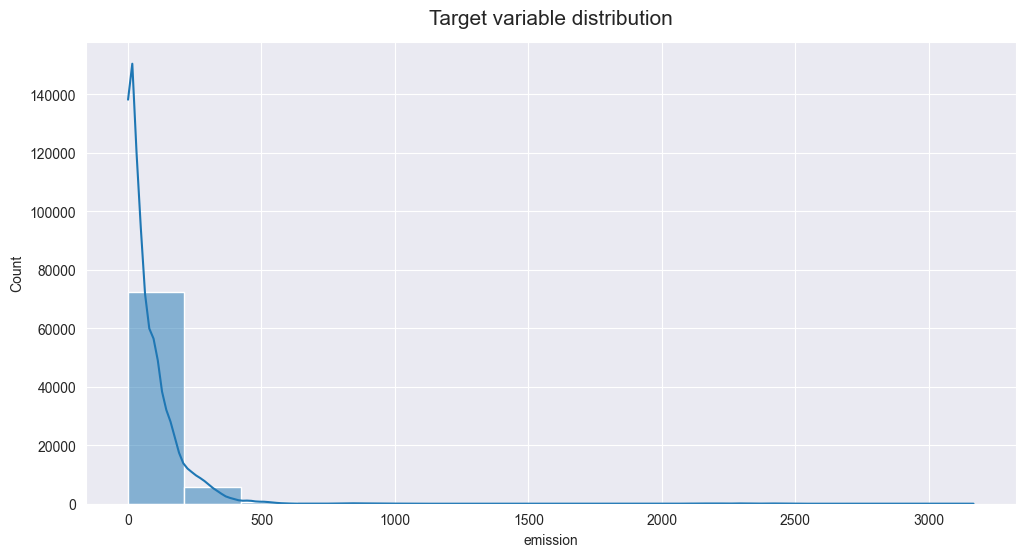

None

10.173825825101622

In [9]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (12, 6))
sns.histplot(train_df.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train_df.emission.skew())

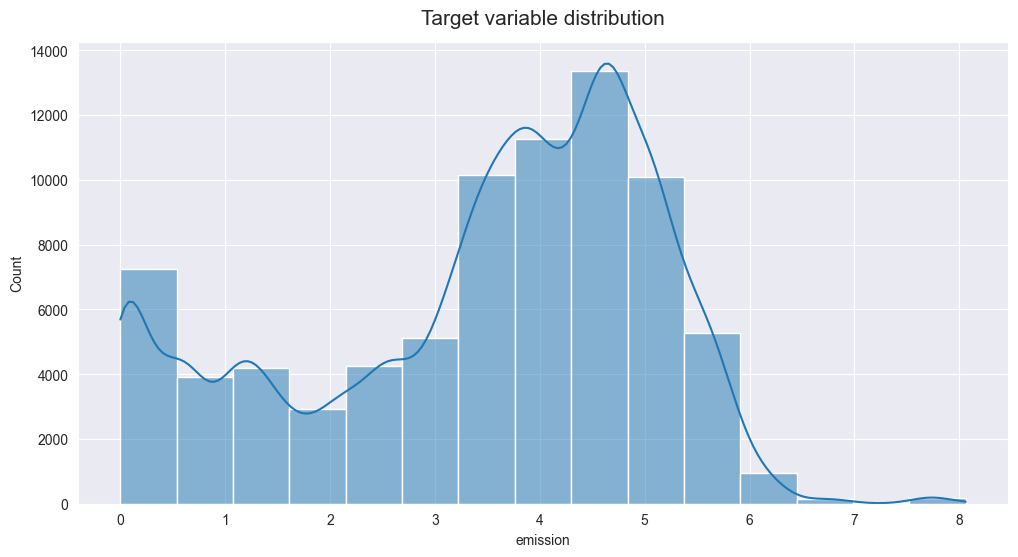

None

-0.6091471436943189

In [10]:
# target variable is right skewed so use a log transformation to make it normally distributed
train_df['emission'] = np.log1p(train_df['emission'])
sns.set_style('darkgrid')
plt.figure(figsize = (12, 6))
sns.histplot(train_df.emission, kde = True, bins = 15)
plt.title('Target variable distribution', y = 1.02, fontsize = 15)
display(plt.show(), train_df.emission.skew())

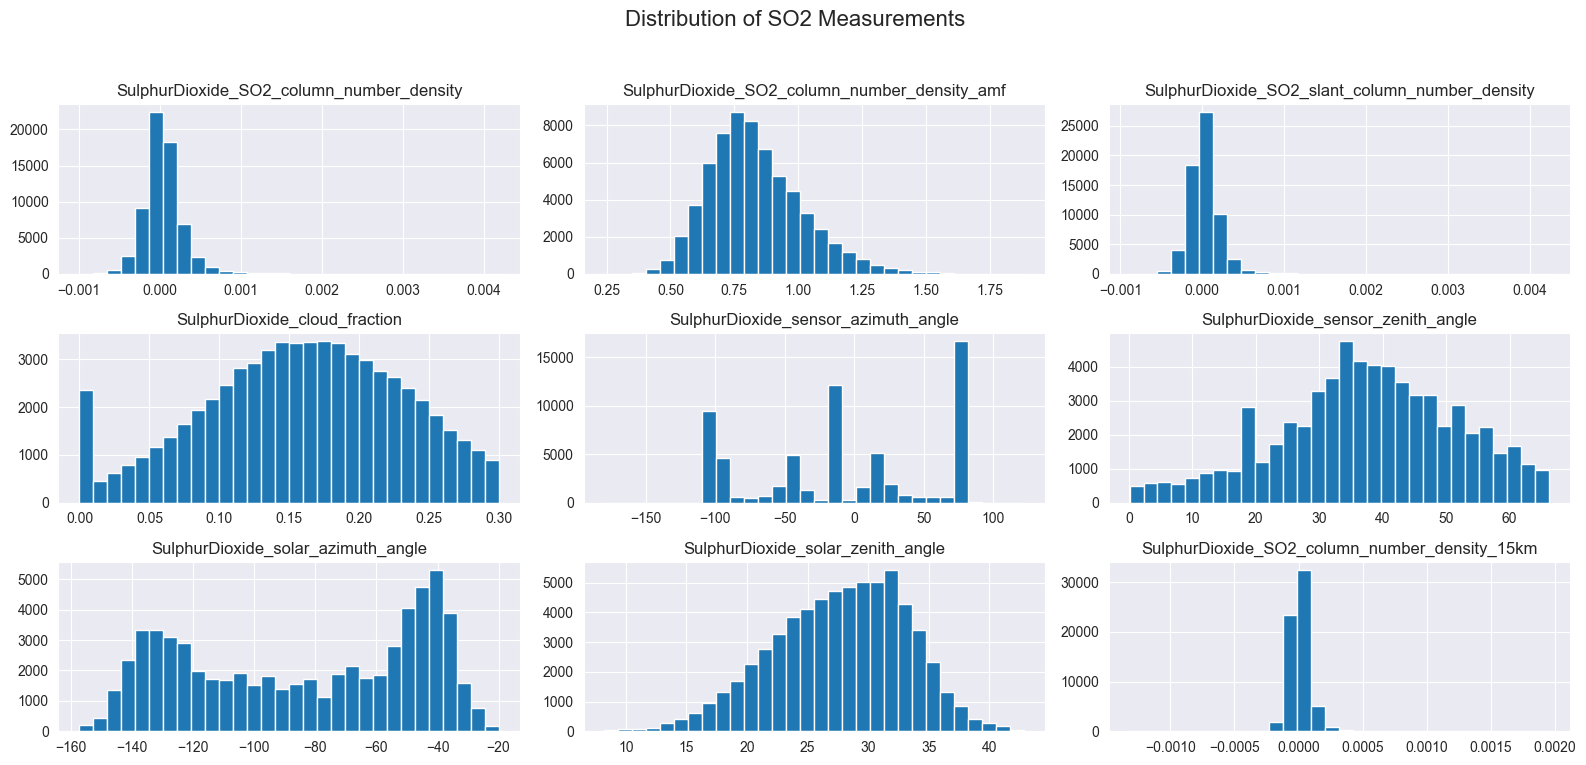

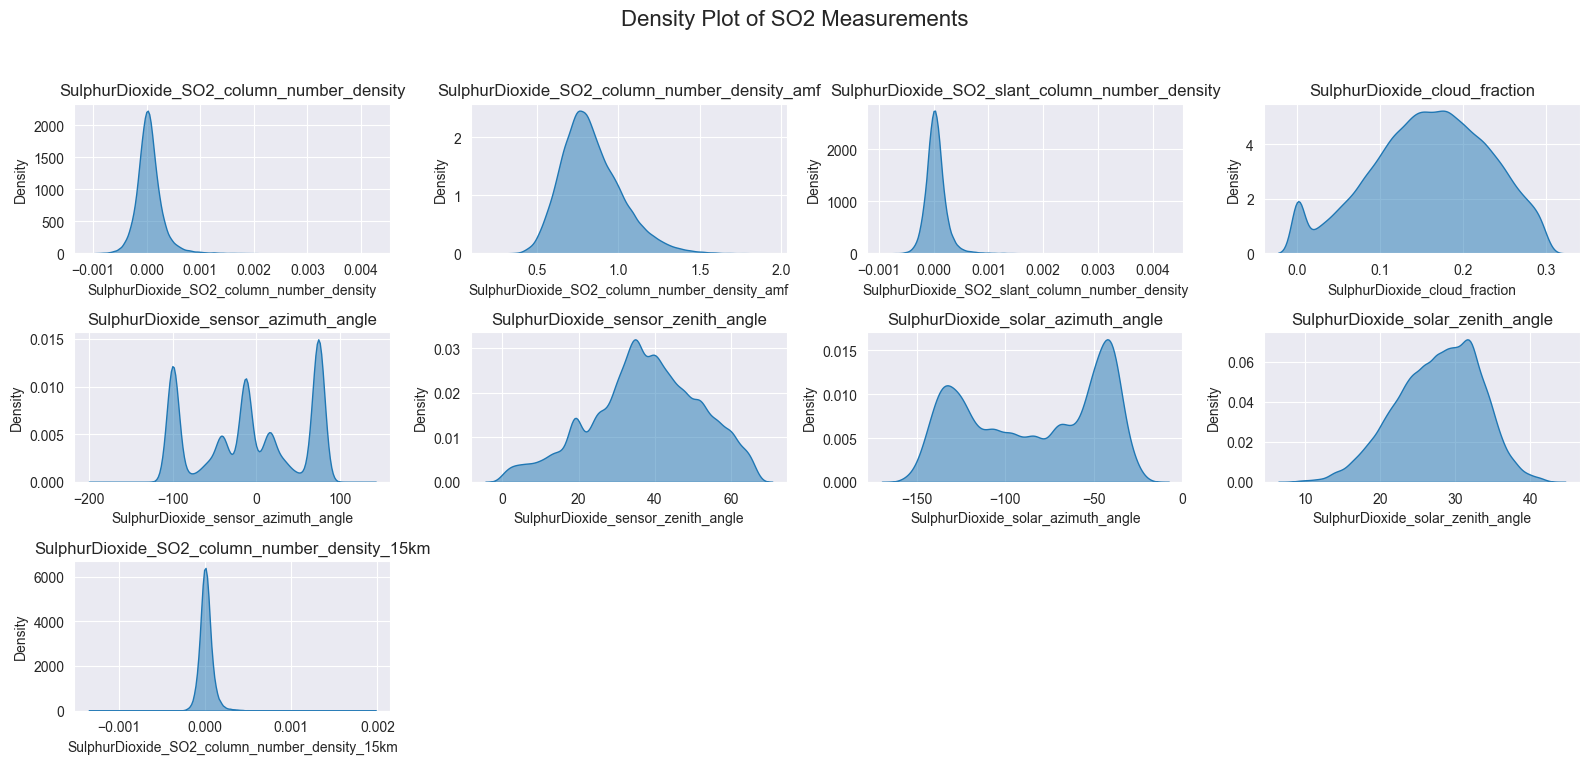

In [11]:
so_columns = ['SulphurDioxide_SO2_column_number_density',
               'SulphurDioxide_SO2_column_number_density_amf',
               'SulphurDioxide_SO2_slant_column_number_density',
               'SulphurDioxide_cloud_fraction',
               'SulphurDioxide_sensor_azimuth_angle',
               'SulphurDioxide_sensor_zenith_angle',
               'SulphurDioxide_solar_azimuth_angle',
               'SulphurDioxide_solar_zenith_angle',
               'SulphurDioxide_SO2_column_number_density_15km']


so_data = train_df[so_columns]

so_data.hist(bins=30, figsize=(16, 8))
plt.suptitle('Distribution of SO2 Measurements', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(16, 8))
num_columns = len(so_data.columns)
num_rows = (num_columns + 3) // 4  
for i, col in enumerate(so_data.columns):
    plt.subplot(num_rows, 4, i+1)
    sns.kdeplot(train_df[col], fill=True, alpha=0.5)
    plt.title(col)
plt.suptitle('Density Plot of SO2 Measurements', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
data['date'] = pd.to_datetime(data['year'].astype(str) + '-W' + data['week_no'].astype(str) + '-1', format='%Y-W%W-%w')
data['quarter'] = data['date'].dt.quarter
data['month'] = data['date'].dt.month
data.set_index('date', inplace=True)

data = data.groupby(data.index).mean()

season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}


data['season'] = data['month'].map(season_mapping)

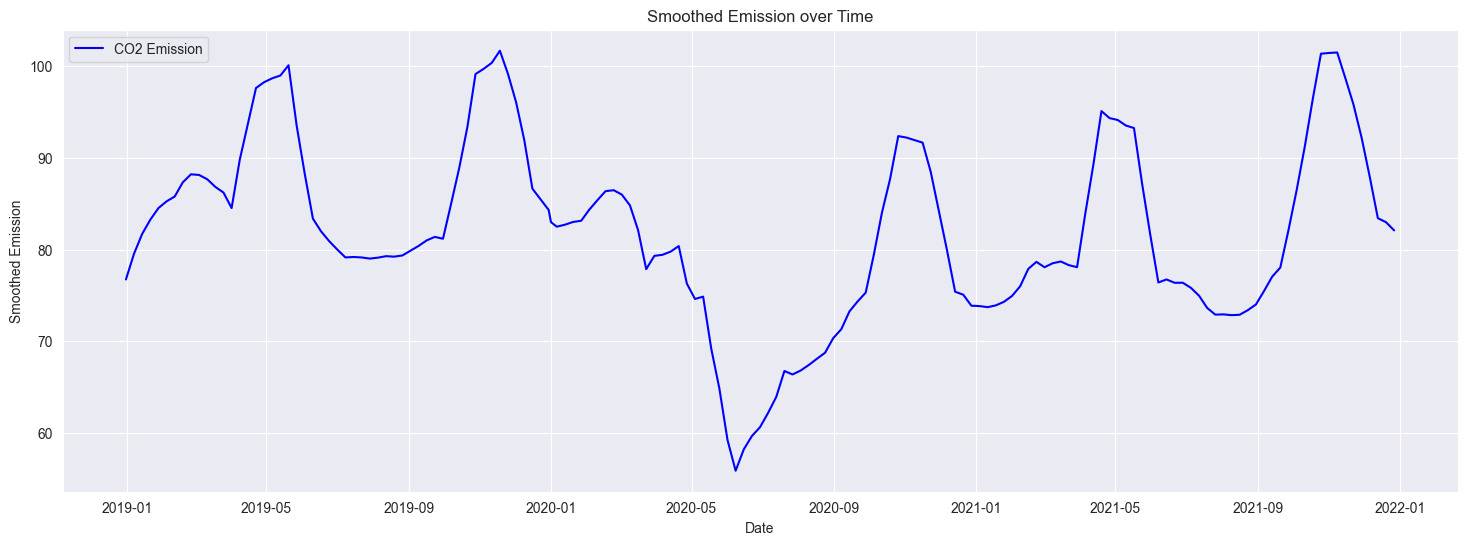

In [13]:
window_size = 7
data['emission_smoothed'] = data['emission'].rolling(window=window_size, min_periods=1).mean()
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(data.index, data['emission_smoothed'], color='blue', label='CO2 Emission')
ax.legend()
ax.set_title('Smoothed Emission over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Smoothed Emission')

plt.show()

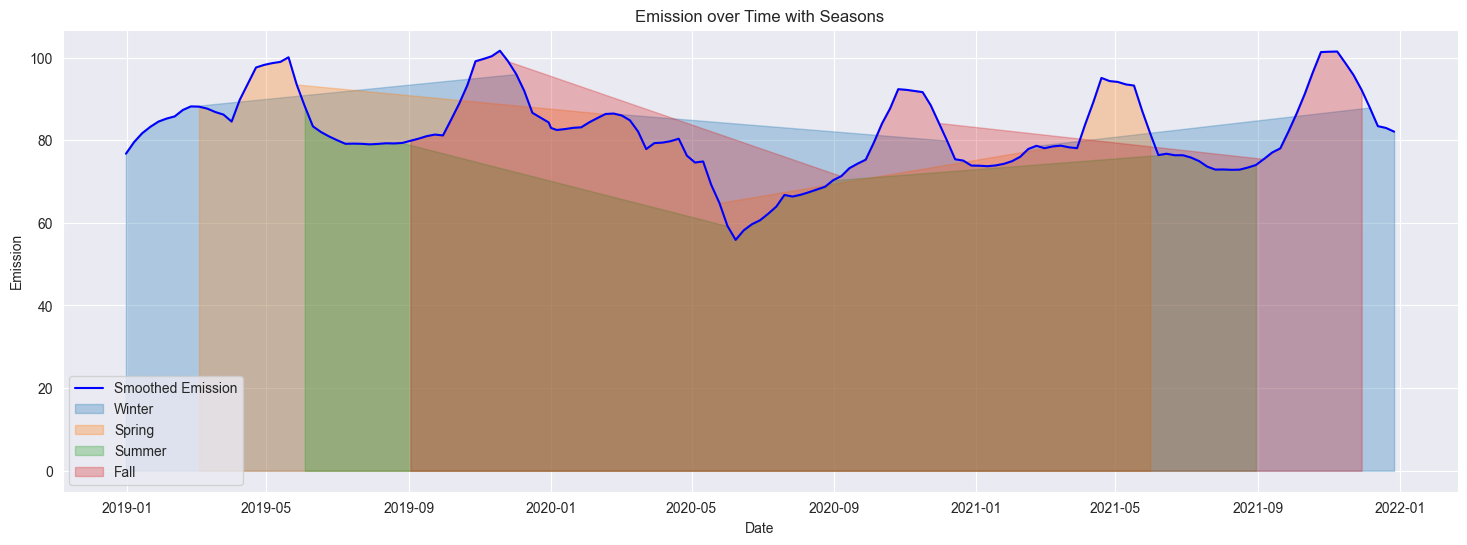

In [14]:
window_size = 7
data['emission_smoothed'] = data['emission'].rolling(window=window_size, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(18, 6))

seasons = data['season'].unique()

ax.plot(data.index, data['emission_smoothed'], color='blue', label='Smoothed Emission')

for i, season in enumerate(seasons):
    season_data = data[data['season'] == season]
    ax.fill_between(season_data.index, season_data['emission_smoothed'], color=f'C{i}', alpha=0.3, label=season)

ax.legend()
ax.set_title('Emission over Time with Seasons')
ax.set_xlabel('Date')
ax.set_ylabel('Emission')
plt.show()

The difference in distribution between the training dataset and the test dataset seems to be a bit large, which could lead to generalization problems

In [16]:
import plotly.graph_objects as go
weekly_emissions = pd.DataFrame({
    'date': pd.date_range(start='2019-01-01', periods=156, freq='W'),
    'year': [2019]*52 + [2020]*52 + [2021]*52,
    'SulphurDioxide': [0.5]*52 + [0.4]*52 + [0.3]*52,
    'CarbonMonoxide': [1.2]*52 + [1.0]*52 + [0.8]*52,
    'NitrogenDioxide': [0.7]*52 + [0.6]*52 + [0.5]*52,
    'Formaldehyde': [0.3]*52 + [0.2]*52 + [0.1]*52
})

fig = go.Figure()

pollutant_groups = ['SulphurDioxide', 'CarbonMonoxide', 'NitrogenDioxide']
for pollutant in pollutant_groups:
    fig.add_trace(go.Scatter(x=weekly_emissions['date'], y=weekly_emissions[pollutant], mode='lines', name=pollutant))
fig.update_layout(
    title_text='Weekly Carbon Emissions by Year for Each Pollutant Group',
    xaxis=dict(
        title='Date',
        titlefont_size=16,
    ),
    yaxis=dict(
        title='Emission Value',
        titlefont_size=16,
    ),
    template='xgridoff'
)

fig.show()

The following diagram shows that the Carbon emissions of most locations got smaller from 2019 to 2020, presumably because of Covid, but increased again from 2020 to 2021. The big question is how this should be extrapolated to 2022...

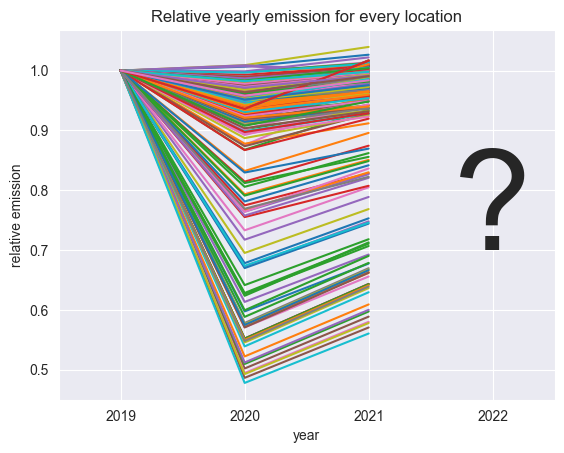

In [17]:
from matplotlib.ticker import MaxNLocator
for ll in train_df[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train_df[(train_df.latitude == ll[1].latitude) & (train_df.longitude == ll[1].longitude)].groupby('year').emission.mean()
    time_series = time_series / time_series.loc[2019]
    plt.plot(time_series.index, time_series)
plt.title('Relative yearly emission for every location')
plt.xlabel('year')
plt.ylabel('relative emission')
plt.xlim(2018.5, 2022.5)
plt.text(2022, 0.7, '?', fontsize=100, ha='center')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

- I noticed that the difference in distribution between the training dataset and the test dataset seems to be a bit large, which could lead to generalization problems.

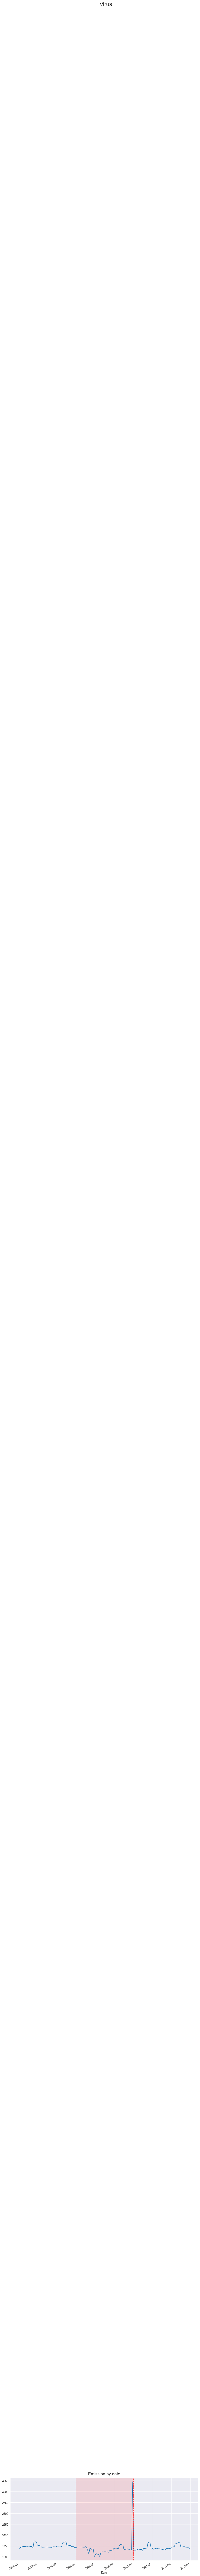

In [18]:
train_plot = train_df.copy(deep=True)
train_plot['date'] = pd.to_datetime(train_plot['year'].astype(str) + '-' + train_plot['week_no'].astype(str) + '-1', format='%Y-%W-%w') # 1 is a monday and %w day of week otherwise throws error
train_plot.groupby(['date'])['emission'].sum().plot(kind='line', figsize=(12, 6), xlabel='Date')

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), color='red', alpha=0.1)
plt.axvline(pd.Timestamp('2020-01-01'), linestyle = "--", color='red')
plt.axvline(pd.Timestamp('2021-01-01'), linestyle = "--", color='red')

plt.text(pd.Timestamp ('2020-05-30'), 60000, "Virus", size = 20)

plt.title('Emission by date', size=15, pad=10)
plt.show()

In [19]:
# Since 2020 is wierd I will remove it for this plot
mask = train_plot['date'].dt.year != 2020
train_plot_no_2020 = train_plot[mask]

In [21]:
train_df.drop_duplicates(subset=['latitude', 'longitude']).shape[0]

497

- Unique locations : Emissions were messured from 497 unique geographical points.

In [22]:
# import cm for LinearColormap
# from matplotlib import cm
import folium
# Group the train by 'latitude' and 'longitude' and compute the sum of the 'emission' values for each location

grouped = train_df.groupby(['latitude', 'longitude'])['emission'].sum().reset_index()

# Create a linear colormap that maps emission values to colors
colormap = folium.LinearColormap(['green', 'red'], vmin=0, vmax=75000) # emssions above 75k will be labeled black

# Create a map centered at the mean latitude and longitude of points
m = folium.Map(location=[grouped['latitude'].mean(), grouped['longitude'].mean()])

# Add a circle marker to the map for each point in grouped dataframe
for _, row in grouped.iterrows():
    rows_emission = row['emission']
    color = 'blue' if rows_emission == 0 else colormap(rows_emission) if rows_emission < 10**5 else 'black'
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=np.sqrt(row['emission'])*15,
        color=color,
        fill=True,
        fill_color= color
    ).add_to(m)

# Fit the map to the bounds of markers
m.fit_bounds(m.get_bounds())

# Display the map
m

In [24]:
def histogram(df, colour, edgeColour):
    data = train_df['NitrogenDioxide_NO2_column_number_density']
    # Create a histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=20, color='yellow', edgecolor='Red')
    plt.title('NO2 Emissions Distribution')
    plt.xlabel('NO2 Emissions')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

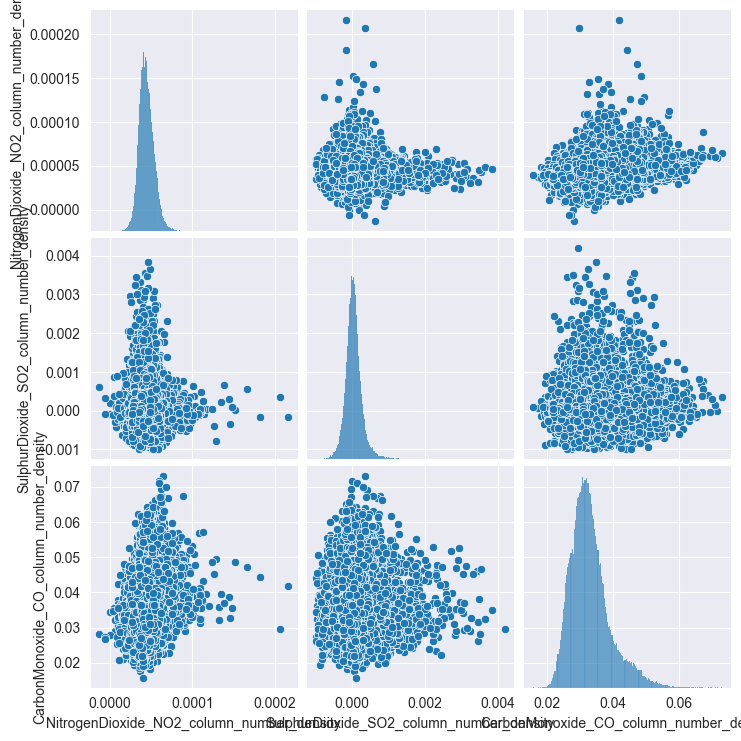

<Figure size 1200x800 with 0 Axes>

In [25]:
subset = train_df[['NitrogenDioxide_NO2_column_number_density','SulphurDioxide_SO2_column_number_density','CarbonMonoxide_CO_column_number_density']]

# Create a pair plot to visualize relationships between multiple variables
sns.pairplot(subset)
plt.figure(figsize=(12, 8))
plt.show()

In [26]:
def checkingForOutliers(train_df, columnName):
    # Plotting boxplot for the emission
    x = train_df['year']
    y = train_df[columnName]
    # extract chemical name from column name
    chemical_name = columnName.split('_')[1]
    # Create a box plot to detect outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y)
    plt.title('Box Plot of {} Emissions by Year'.format(chemical_name))
    plt.xlabel('Year')
    plt.ylabel('{} Emissions'.format(chemical_name))
    plt.show()

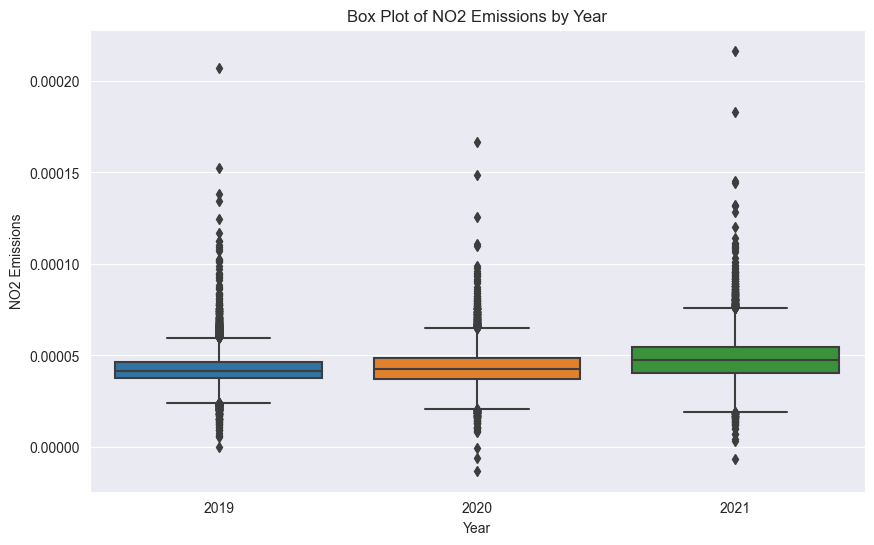

In [27]:
checkingForOutliers(train_df, 'NitrogenDioxide_NO2_column_number_density')

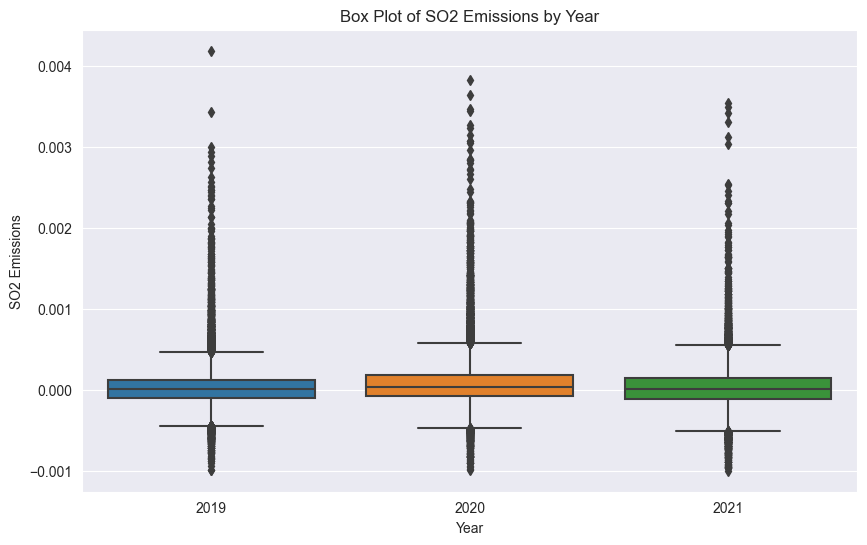

In [28]:
checkingForOutliers(train_df, 'SulphurDioxide_SO2_column_number_density')

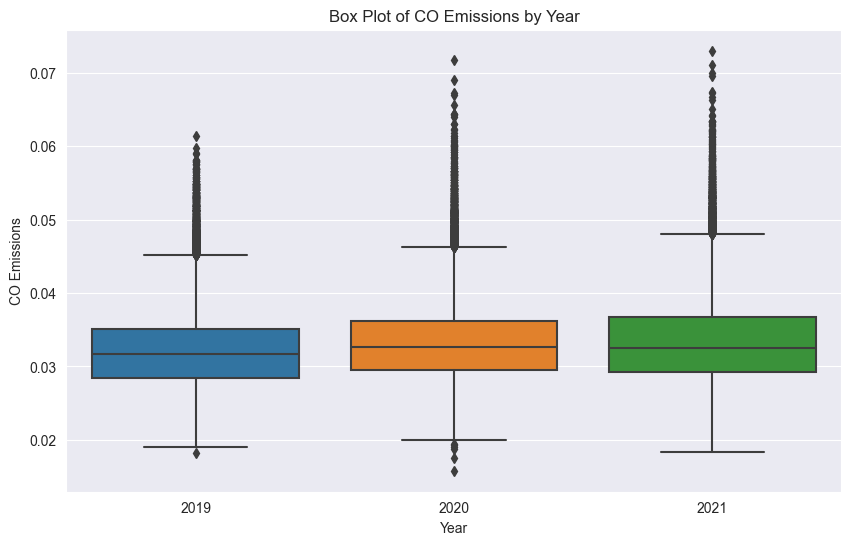

In [29]:
checkingForOutliers(train_df, 'CarbonMonoxide_CO_column_number_density')

In [30]:
# handle outliers
def handleOutliers(train_df,columnName):
    # Calculate the first and third quartile
    first_quartile = train_df[columnName].describe()['25%']
    third_quartile = train_df[columnName].describe()['75%']
    # Interquartile range
    iqr = third_quartile - first_quartile
    # Remove outliers
    train_df = train_df[(train_df[columnName] > (first_quartile - 3 * iqr)) &
              (train_df[columnName] < (third_quartile + 3 * iqr))]
    y = train_df[columnName]
    x = train_df['year']
    # extract chemical name from column name
    chemicalName = columnName.split('_')[1]
    # Create a box plot to detect outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y)
    plt.title('{} Emissions by Year (Box Plot)'.format(chemicalName))
    plt.xlabel('Year')
    plt.ylabel('{} Emissions'.format(chemicalName))
    plt.show()

- Handling Outliers in NO2 column

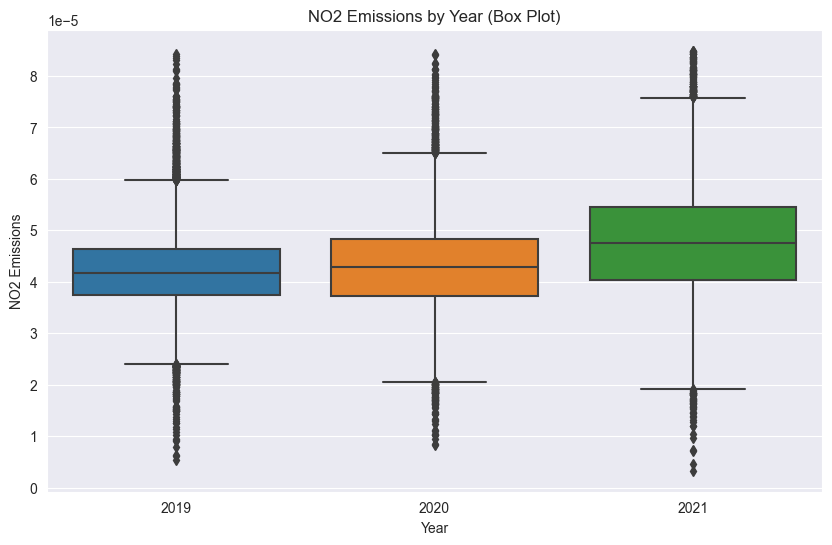

In [31]:
handleOutliers(train_df, 'NitrogenDioxide_NO2_column_number_density')

- Handling outliers in SO2 column

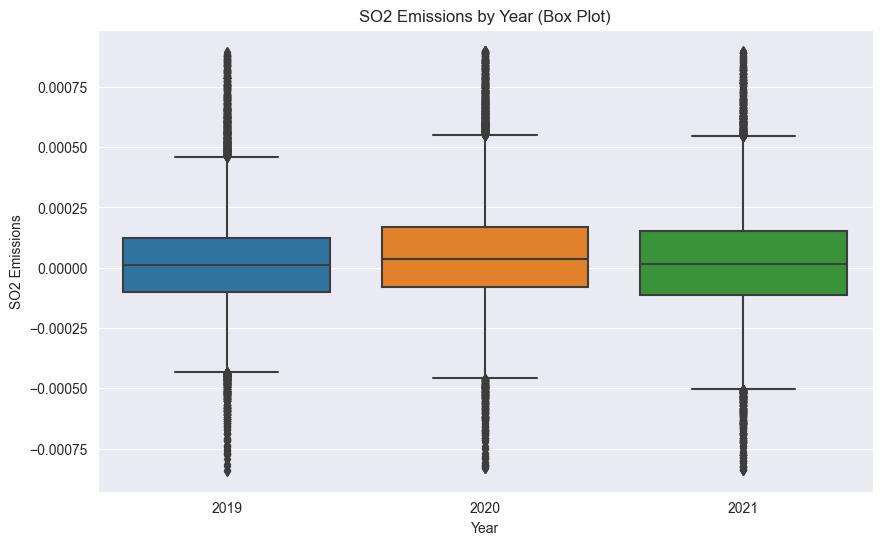

In [32]:
handleOutliers(train_df, 'SulphurDioxide_SO2_column_number_density')

- Hanfling outliers in PM10 column

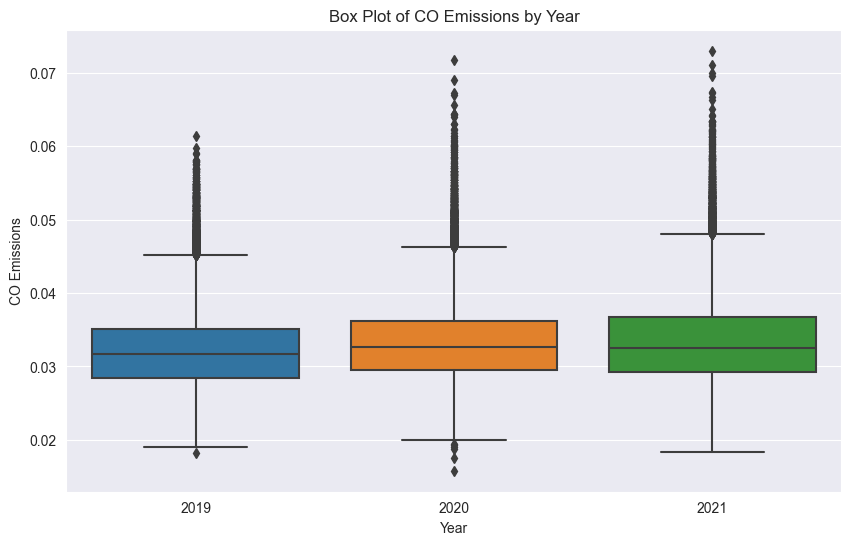

In [33]:
checkingForOutliers(train_df, 'CarbonMonoxide_CO_column_number_density')

## Geo Visualization

In [34]:
# Combine train and test for easy visualisation
train_coords = train_df.drop_duplicates(subset = ['latitude', 'longitude'])
test_coords = test_df.drop_duplicates(subset = ['latitude', 'longitude'])
train_coords['set_type'], test_coords['set_type'] = 'train', 'test'

all_data = pd.concat([train_coords, test_coords], ignore_index = True)
# Create point geometries

geometry = gpd.points_from_xy(all_data.longitude, all_data.latitude)
geo_df = gpd.GeoDataFrame(
    all_data[["latitude", "longitude", "set_type"]], geometry=geometry
)

# Preview the geopandas train_df
geo_df.head()

,latitude,longitude,set_type,geometry
0,-0.51000,29.29000,train,POINT (29.29000 -0.51000)
1,-0.52800,29.47200,train,POINT (29.47200 -0.52800)
2,-0.54700,29.65300,train,POINT (29.65300 -0.54700)
3,-0.56900,30.03100,train,POINT (30.03100 -0.56900)
4,-0.59800,29.10200,train,POINT (29.10200 -0.59800)



- As we are working with geographical data, measurements of nearby locations can help to predict the target.
- A good machine learning model will not simply take the 33 features of every row to predict the target, but use the features of nearby locations to improve the predictions.
- The data is a time series. Measurements of earlier points in time may help to predict the current point.

In [36]:
# matplotlib import
import matplotlib
def rgba_to_hex(color):
    """Return color as #rrggbb for the given color values."""
    red, green, blue, alpha = color
    return f"#{int(red*255):02x}{int(green*255):02x}{int(blue*255):02x}"

temp = train_df.groupby(['latitude', 'longitude']).emission.mean().reset_index()
geometry = gpd.points_from_xy(temp.longitude, temp.latitude)

cmap = matplotlib.colormaps['coolwarm']
normalizer = matplotlib.colors.Normalize(vmin=np.log1p(temp.emission.min()), vmax=np.log1p(temp.emission.max()))

# Create a canvas to plot your map on
all_data_map = folium.Map(prefer_canvas=True)

# Create a geometry list from the GeoDataFrame
geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geometry]

# Iterate through list and add a marker for each location
for coordinates, emission in zip(geo_df_list, temp.emission):
#     print(emission, normalizer(emission), rgba_to_hex(cmap(normalizer(emission))))
    # Place the markers 
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            color = rgba_to_hex(cmap(normalizer(np.log1p(emission))))),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map


- Points in the west (Democratic Republic of the Congo) all have low emissions.
- The two red points with the highest emissions are both near Lac Kivu.

The plot shows

- The two locations with very high emissions have special patterns (red and gray); all other locations look similar.
Seasonality: There are yearly patterns (which repeat every 53 weeks).

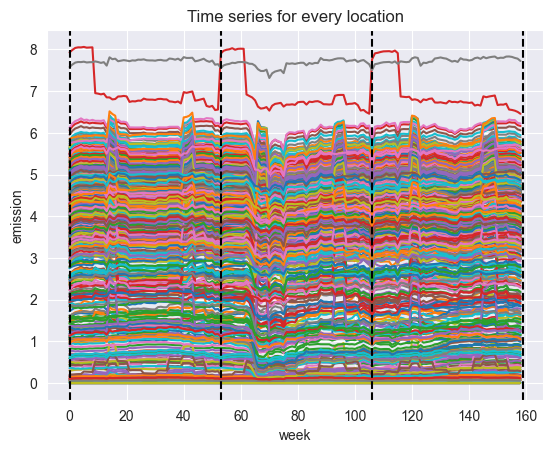

In [38]:
for ll in train_df[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = train_df[(train_df.latitude == ll[1].latitude) & (train_df.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

We can try to identify trends in the emission data. The following diagram shows that the CO2 emissions of most locations got smaller from 2019 to 2020, presumably because of Covid, but increased again from 2020 to 2021. The big question is how this should be extrapolated to 2022...

### 6. Missing Values and duplicates

Values are missing if during a whole week the satellite never could make a reliable measurement for a location, for instance because of clouds or because it never saw the location from a good angle. The next notebook cell shows a row from the training data without measurements for SO2, NO2

In [40]:
# Check for missing values
train_df.isnull().sum().any(), test_df.isnull().sum().any() 

(True, True)

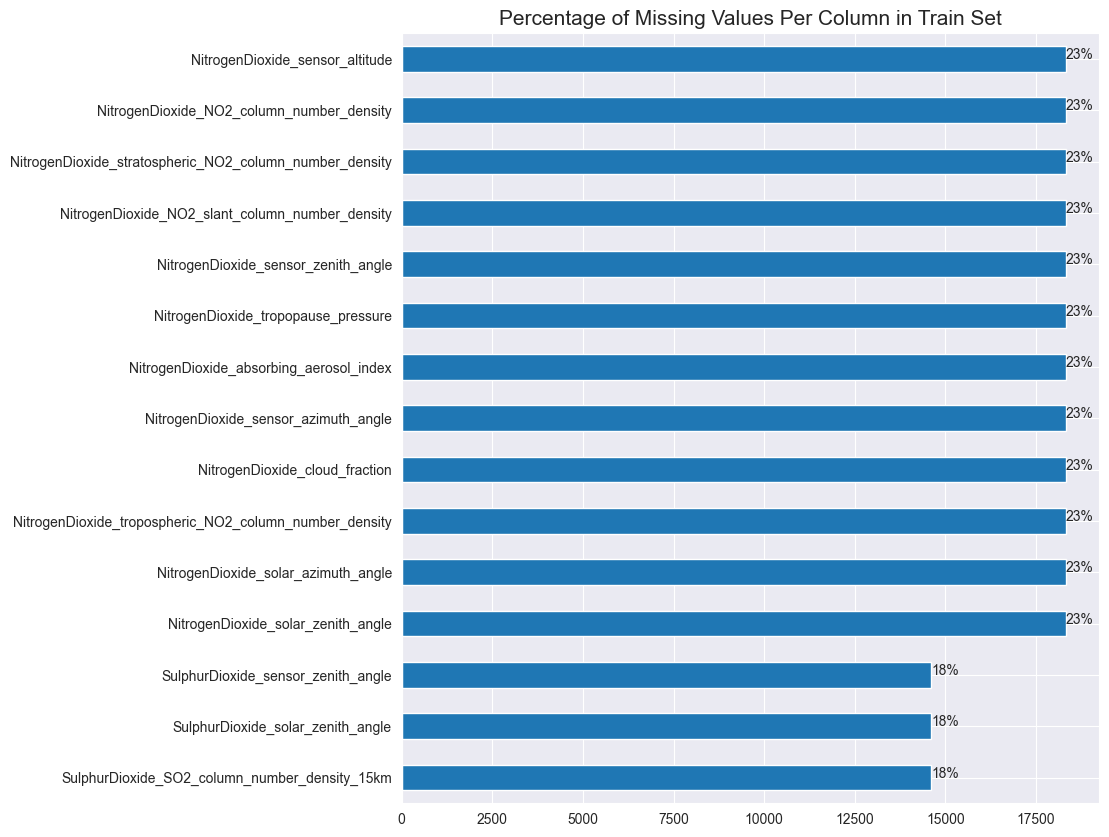

In [41]:
# Plot missing values in train_df
ax = train_df.isna().sum().sort_values(ascending = False)[:15][::-1].plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train_df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))


In [42]:
# fill missing values with mean
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

In [43]:
train_df.isnull().sum().any(), test_df.isnull().sum().any() 

(False, False)

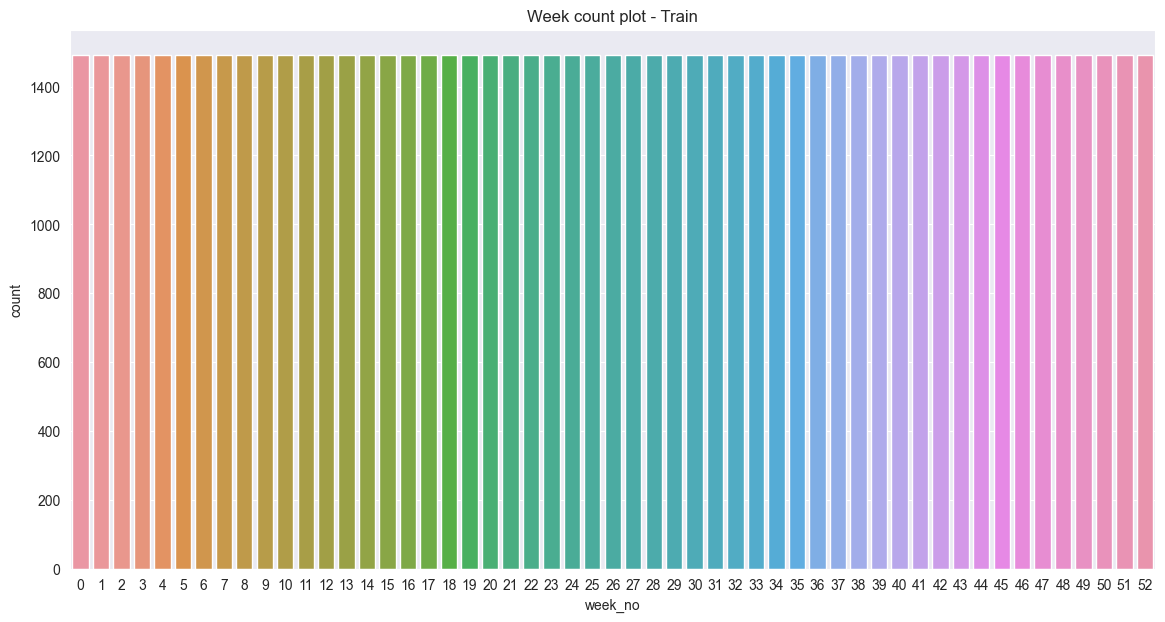

In [45]:
plt.figure(figsize = (14, 7))
sns.countplot(x = 'week_no', data = train_df)
# plt.bar(train_df['week_no'].value_counts().index, train_df['week_no'].value_counts().values)
plt.title('Week count plot - Train')
plt.show()

In [46]:
train_df.drop_duplicates(subset = ['year', 'week_no']).groupby(['year'])[['week_no']].count()

,week_no
year,
2019,53
2020,53
2021,53


In [47]:
test_df.drop_duplicates(subset = ['year', 'week_no']).groupby(['year'])[['week_no']].count()

,week_no
year,
2022,49


### 8. Correlations - EDA

In [48]:
top20_corrs = abs(train_df.corr()['emission']).sort_values(ascending = False).head(20)
top20_corrs

emission                                                  1.00000
longitude                                                 0.31840
CarbonMonoxide_H2O_column_number_density                  0.09606
CarbonMonoxide_CO_column_number_density                   0.07659
CarbonMonoxide_cloud_height                               0.06916
SulphurDioxide_SO2_column_number_density_15km             0.06817
SulphurDioxide_SO2_slant_column_number_density            0.06738
SulphurDioxide_SO2_column_number_density                  0.06597
NitrogenDioxide_absorbing_aerosol_index                   0.03909
NitrogenDioxide_solar_azimuth_angle                       0.03695
NitrogenDioxide_cloud_fraction                            0.03516
SulphurDioxide_solar_azimuth_angle                        0.03402
SulphurDioxide_SO2_column_number_density_amf              0.02960
NitrogenDioxide_sensor_altitude                           0.02916
NitrogenDioxide_NO2_slant_column_number_density           0.02735
NitrogenDi

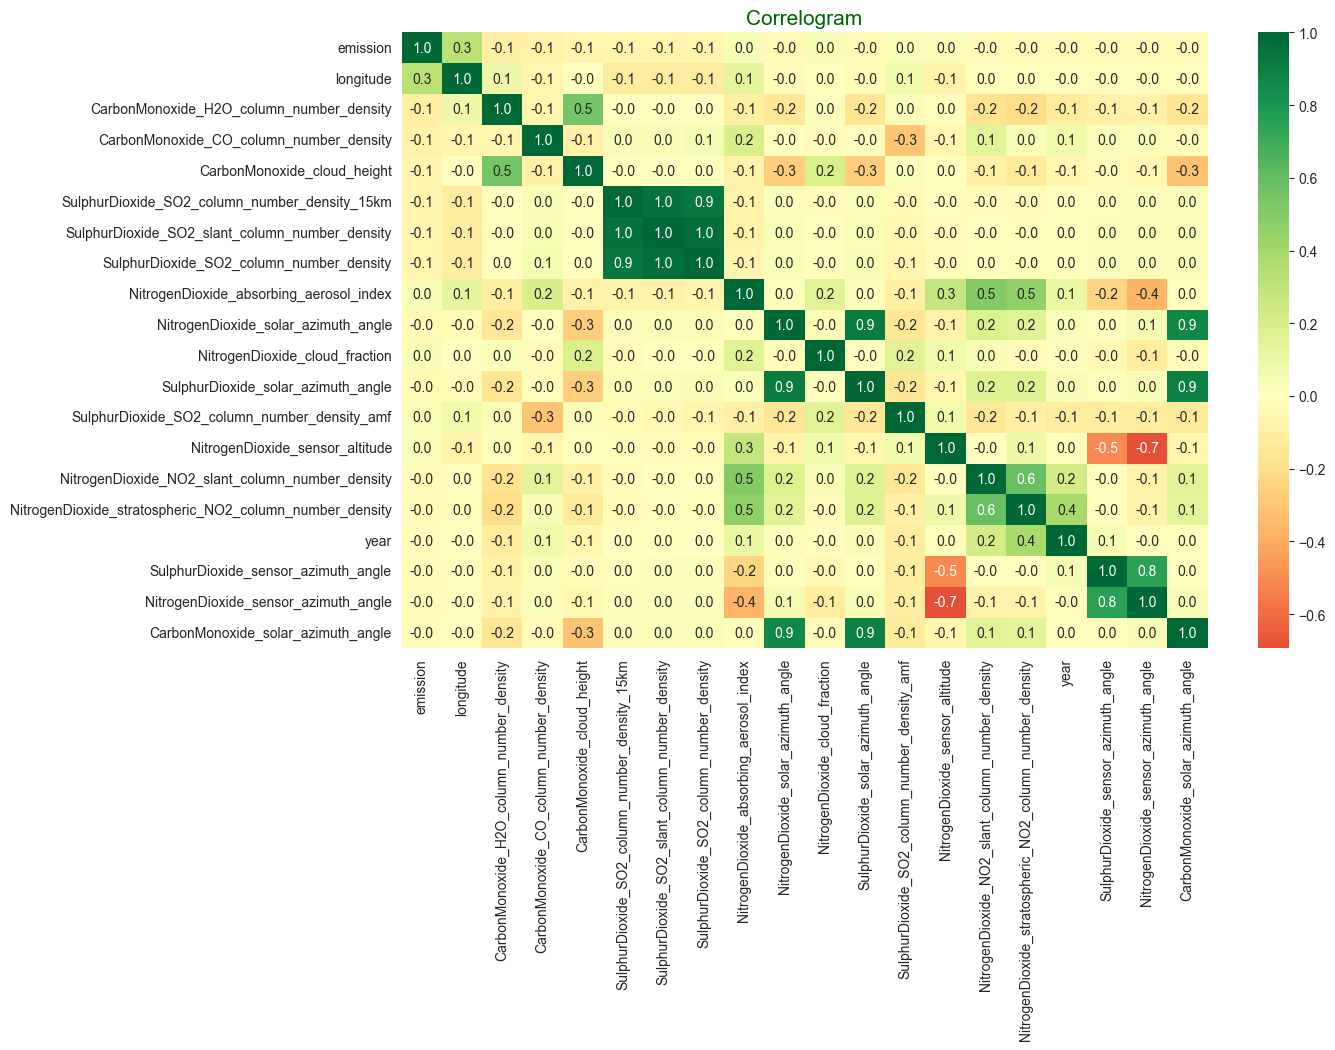

In [63]:
# Quantify correlations between features
corr = train_df[list(top20_corrs.index)].corr()
corr.round(1)
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0, fmt = '.1f')
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [50]:
train_df.shape, test_df.shape

((79023, 34), (24353, 33))

-2.93 29.57


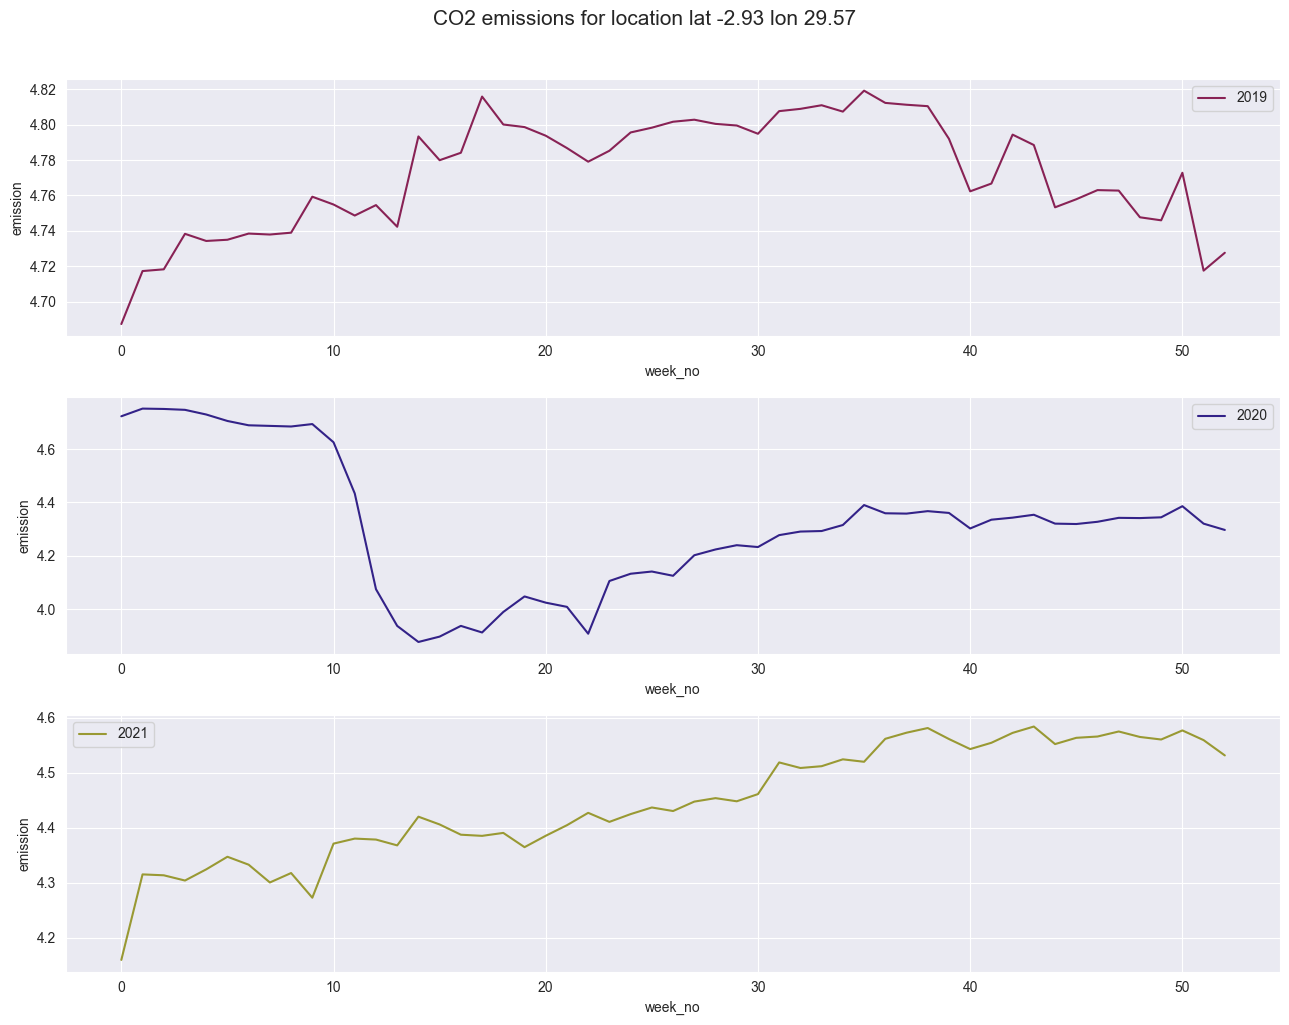

In [51]:
# Sample a unique location and visualize its emissions across the years
train_df.latitude, train_df.longitude = round(train_df.latitude, 2), round(train_df.longitude, 2)
# generate a random value between 1 and 79023
random_loc = random.randint(1, 79023)
# sample a unique location
print(train_df.latitude[random_loc], train_df.longitude[random_loc])
sample_loc = train_df[(train_df.latitude == train_df.latitude[random_loc]) & (train_df.longitude == train_df.longitude[random_loc])]

# sample_loc = train_df[(train_df.latitude == -0.510) & (train_df.longitude == 29.290)]

# Plot a line plot
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (13, 10))
fig.suptitle('CO2 emissions for location lat {} lon {}'.format(train_df.latitude[random_loc], train_df.longitude[random_loc]), y=1.02, fontsize = 15)
# fig.suptitle('Co2 emissions for location lat -23.75 lon 28.75', y=1.02, fontsize = 15)

for ax, data, year, color, in zip(axes.flatten(), sample_loc, sample_loc.year.unique(), ['#882255','#332288', '#999933' , 'orangered']):
  df = sample_loc[sample_loc.year == year]
  sns.lineplot(x=df.week_no,y= df.emission, ax = ax, label = year, color = color)
plt.legend()
plt.tight_layout()

In [52]:
data=train_df[['latitude','longitude','year','week_no','emission']]
data.head()

,latitude,longitude,year,week_no,emission
0,-0.51000,29.29000,2019,0,1.55835
1,-0.51000,29.29000,2019,1,1.61446
2,-0.51000,29.29000,2019,2,1.65468
3,-0.51000,29.29000,2019,3,1.66870
4,-0.51000,29.29000,2019,4,1.67659


In [53]:
data['year'] = data['year'].astype(int)  
data['week_no'] = data['week_no'].astype(int) 


data['date'] = pd.to_datetime(data['year'].astype(str) + data['week_no'].astype(str) + '0', format='%Y%U%w')
data.head()

,latitude,longitude,year,week_no,emission,date
0,-0.51000,29.29000,2019,0,1.55835,2019-01-01
1,-0.51000,29.29000,2019,1,1.61446,2019-01-06
2,-0.51000,29.29000,2019,2,1.65468,2019-01-13
3,-0.51000,29.29000,2019,3,1.66870,2019-01-20
4,-0.51000,29.29000,2019,4,1.67659,2019-01-27
